#  ATOC5860 Application Lab #2 - AR1_regression_AO
##### Originally coded by Prof. Kay (CU) and Elizabeth Maroon (CU postdoc, now U.Wisc)
##### last updated January 31, 2024

### LEARNING GOALS:
1) Calculate and analyze the autocorrelation at a range of lags using output from an EOF analysis (the Arctic Oscillation Index).
2) Generate a red noise time series with equivalent memory as an observed time series (i.e., given lag-1 autocorrelation).
3) Correlate two time series and calculate the statistical significance.
4) Evaluate the statistical significance obtained in the context of the number of chances provided for success.  What happens when you go “fishing” for correlations and give yourself lots of opportunity for success?  Can you critically evaluate the chances that your regression is statistically different than 0 just by chance?

### DATA and UNDERLYING SCIENCE MOTIVATION:  
In this notebook, you will analyze the monthly Arctic Oscillation (AO) timeseries from January 1950 to present. The AO timeseries comes from an Empirical Orthogonal Function (EOF) analysis. We will implement EOFs in the next unit in ATOC5860. Yea! In this lab we are actually using multiple analysis methods introduced in this class, some that you have learned and some that you are still yet to learn.

How do you find the AO value each month?  To identify the atmospheric circulation patterns that explain the most variance, NOAA regularly applies EOF analysis to the monthly mean 1000-hPa height anomalies poleward of 20° latitude for the Northern Hemisphere. The AO spatial pattern (Figure 1 below) emerges as the first EOF (explaining the most variance, 19%). The AO timeseries we will analyze is a measure of the amplitude of the pattern in Figure 1 in a given month.  In other words – the AO timeseries is the first principal component (a timeseries) associated with the first EOF (a spatial structure). More information on the EOF analysis __[here](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/history/method.shtml)__

![model_pipeline](./lab2_figure1.png)

The data are available and regularly updated  __[here](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii)__

You can work with the data directly on the web (assuming you have an internet connection). I have also downloaded the data and made them available. The name of the data file is **monthly.ao.index.b50.current.ascii**.

### Non-exhaustive Questions to guide your analysis:  

1) Start with the default settings in the code.  First read in the Arctic Oscillation (AO) data.  Look at your data!!  Plot it as a timeseries.

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import xarray
import pandas as pd   ##pandas reads in .csv.
from scipy import stats
import seaborn as sns  ### seaborn just makes things pretty -- no new typing
sns.set_style('whitegrid')  ###  change away from grey grid (seaborn default) to white grid

In [2]:
### Define function.  
### Functions can be really useful for compact code. Feel free to expand. 
### But double and triple check functions when you write them, functions can obscure what the code is doing.
### We will tend to not use them in ATOC5860 because we always wto have eyes on the code we are running.
def ar1_series(a,N):
    red_series = []
    red_series.append(1)
    for t in range(1,N,1):
        red_series.append(a*red_series[t-1] + np.sqrt(1-np.power(a,2))*stats.norm.rvs(size=1)) ##Barnes Ch. 2 Eq. 69
    return_red_series = np.vstack(red_series)[:,0] ## convert to a numpy float array
    return return_red_series

   year  month      AO         time
0  1950      1 -0.0603  1950.041667
1  1950      2  0.6268  1950.125000
2  1950      3 -0.0081  1950.208333
3  1950      4  0.5551  1950.291667
4  1950      5  0.0716  1950.375000
     year  month      AO         time
883  2023      8 -0.6023  2023.625000
884  2023      9  0.3181  2023.708333
885  2023     10 -0.4139  2023.791667
886  2023     11 -0.0358  2023.875000
887  2023     12 -0.2215  2023.958333


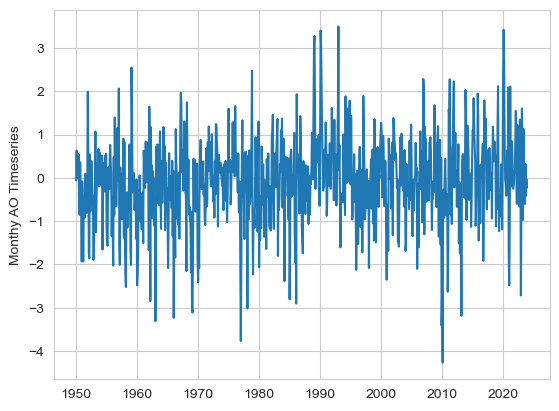

In [3]:
### This notebook uses data from the Arctic Oscillation regularly updated by NOAA
### For more information go here: 
### http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/history/method.shtml

## Load in AO timeseries from the web, Look at it, and Plot it

## Note this will not work if you do not have an internet connection as it is directly grabbing the data from the web.
#data = pd.read_csv('http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii',\
#                   sep='\s+',header=None, names = ['year', 'month','AO'])
## if not on-line
data = pd.read_csv('monthly.ao.index.b50.current.ascii',\
                   sep='\s+',header=None, names = ['year', 'month','AO'])

data['time']=data['year']+data['month']/12-1/24
#print(data)
plt.plot(data['time'],data['AO'])
plt.savefig('AO_timeseries.eps')  ## save your plot as a postscript file
plt.ylabel('Monthy AO Timeseries')
print(data.head());
print(data.tail());

2) Calculate the lag-one autocorrelation (AR1) of the AO data and record it here. Use two methods (np.correlate, dot products).  Check that they give you the same result.  Interpret the value.  How much memory (red noise) is there in the AO from month to month?

30% autocorrelation, not statistically significant?, 

In [4]:
## Calculate the lag-one autocorrelation (AR1) of the AO data and print it to the screen
## Use two methods (np.correlate, dot products).  They should give you the same result.
time=data['time']
tseries=data['AO']
sigma=np.std(tseries)  ## calculate the standard deviation
mean=np.mean(tseries)  ## calculate the mean
n=len(tseries)         ## calculate the length of the timeseries
lag=1

##Create two timeseries of the data at t=t1 and t=t2; remove the mean
t1_m=tseries[0:-1*lag]-mean
t2_m=tseries[lag:]-mean

#Method #1
#Calculate the autocorrelation using numpy correlate lagN
lagNauto_np=np.correlate(t1_m,t2_m,mode='valid')/(n-lag)/(sigma**2)  ## Eq. 67 divided by the variance
print('np.correlate autocorrelation: ',np.round(lagNauto_np,5))

#Method #2 (should be faster)
#Calculate the autocorrelation using np.dot (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html)
lagNauto=np.dot(t1_m,t2_m)/(n-lag)/sigma**2 ## Eq. 67 divided by the variance
print('direct calculation autocorrelation:',np.round(lagNauto,5))

if lag==1: ar1=lagNauto

np.correlate autocorrelation:  [0.30076]
direct calculation autocorrelation: 0.30076


3) Calculate and plot the autocorrelation of the AO data at all lags.  Describe your results.  How red are the data at lags other than lag=1?  Is there any interesting behavior of the autocorrelation as a function of lag?  What would you expect for red noise timeseries with an AR1=value reported in 2)?

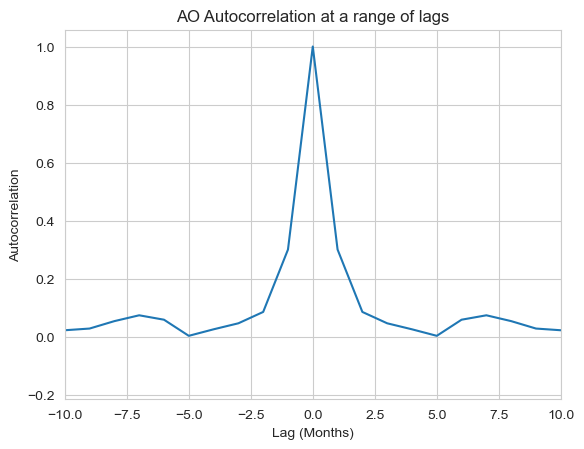

In [5]:
#Calculate and plot the autocorrelation at all lags
tseries1=tseries-mean
half=int(len(tseries)/2)
lags=np.arange(-1*half,half,1.)

## note - mode='same' is supposed to be chopping tseries1 so that it has the same length even when lagged.
## in principal this should work but it wasn't working for me.
#plt.plot(range(-1*half,half),np.correlate(tseries1,tseries1,mode='same')/((n-lags)*sigma**2)) ##Eq. 67 divided by variance

## same as above but ensuring that the lags and autocorrelations have the same length for plotting
foo=np.correlate(tseries1,tseries1,mode='same')
#print(np.shape(foo))
foo1=np.shape(lags)
#print(foo1)
plt.plot(lags,foo[0:foo1[0]]/((n-np.abs(lags))*sigma**2)) ##Eq. 67 divided by variance

plt.xlim([-10,10])
plt.xlabel('Lag (Months)');
plt.ylabel('Autocorrelation');
plt.title('AO Autocorrelation at a range of lags');

4) Generate a synthetic red noise time series with the same lag-1 autocorrelation as the AO data. Your synthetic dataset should have different time evolution but the same memory as the AO.  Plot the AO timeseries and the synthetic red noise time series. Put the plot below.

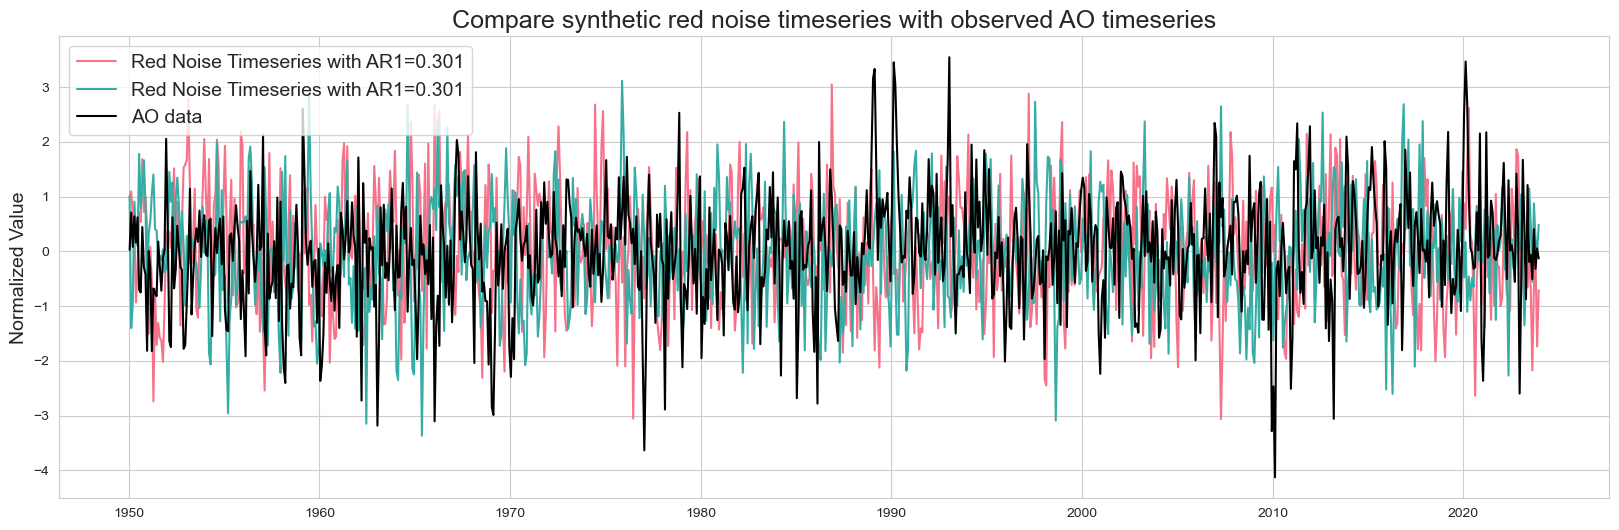

In [17]:
## Generate red noise time series with the same lag-1 autocorrelation as the AO
## In other words - generate a synthetic dataset with the same memory as the AO.

tsnum=2 ## how many red noise time series to generate
numred=len(time) ## length of red noise time series
t_1=np.empty((tsnum,numred),dtype=float)
colors=sns.color_palette('husl',tsnum) ##palette of colors
f=plt.figure(figsize=(20,6))
for nn in range(tsnum):
    t_1[nn,:] = ar1_series(ar1,numred)
    plt.plot(time,t_1[nn,:],color=colors[nn],label='Red Noise Timeseries with AR1='+str(np.round(ar1,3)))

##Plot the two timeseries - the synthetic red noise and the actual data    
plt.plot(time,(tseries-tseries.mean())/tseries.std(),color='black',label='AO data');
plt.ylabel('Normalized Value',fontsize=14);
plt.title('Compare synthetic red noise timeseries with observed AO timeseries',fontsize=18);
plt.legend(loc='upper left',fontsize=14);

5) Do you expect to find any correlation between the two datasets, i.e., the synthetic red noise and the actual AO data? What is the correlation between the synthetic red noise and the actual AO data?  Calculate a regression coefficient and other associated regression statistics. 

In [18]:
### What is the correlation between the synthetic red noise and the actual AO data?
rednoise=t_1[0,:]
data=(tseries-tseries.mean())/tseries.std()
slope, intercept, r_value, p_value, std_err = stats.linregress(rednoise,data)
variance_explained_all=(r_value*r_value)*100.
print('What is percent variance explained?:',round(variance_explained_all,4),'%')

What is percent variance explained?: 0.0428 %


6) Next -- Have some fun and go “fishing for correlations”.   What happens if you try correlating subsets of the two datasets many times?  When you try 200 times -- what is the maximum correlation/variance explained you can obtain between the synthetic red noise and the actual data?  *Note: you are effectively searching for a high correlation with no a priori reason to do so.... **THIS IS NOT good practice for science** but we are doing it here because it is instructive to see what happens :)*

In [19]:
### Let's go "fishing for correlations"....
### What happens if you try correlating subsets of the two datasets?  
### What is the correlation between the synthetic red noise and the actual data?
### Can you get higher variance explained?
### Note: you are effectively searching for a high correlation with no a priori reason to do so.... 
### THIS IS NOT good practice for science but interesting to see the results :)

largest_variance=0
largest_r=0
nn_largest_variance=0
length=20
offset=3
N_fishingforcorrelation=200 ## number of times you will go "fishing for correlations"
for nn in range(N_fishingforcorrelation):
    subset_rednoise=rednoise[nn*offset:nn*offset+length]
    subset_data=data[nn*offset:nn*offset+length]
    slope, intercept, r_value, p_value, std_err = stats.linregress(subset_rednoise,subset_data)
    variance_explained=(r_value*r_value)*100.
    if variance_explained > largest_variance: 
        largest_variance=variance_explained
        largest_r=r_value
        nn_largest_variance=nn
    
print('nn_largest_variance',nn_largest_variance)
print('Largest r_value',round(largest_r,2))        
print('Largest variance explained',round(largest_variance,2),'%')

nn_largest_variance 64
Largest r_value -0.72
Largest variance explained 51.23 %


7)  Calculate the correlation statistics for the highest correlation obtained in question 6). Two methods are provided - they should give you the same answers. Place a confidence interval on your correlation. Because you have found a correlation that is not equal to 0, use the Fisher-Z Transformation. Did your "fishing" for a statistically significant correlation work?  Is your highest correlation statistically significant (i.e., can you reject the null hypothesis that the correlation is zero)?  Write out the steps for hypothesis testing and use the values you calculate to formally assess.

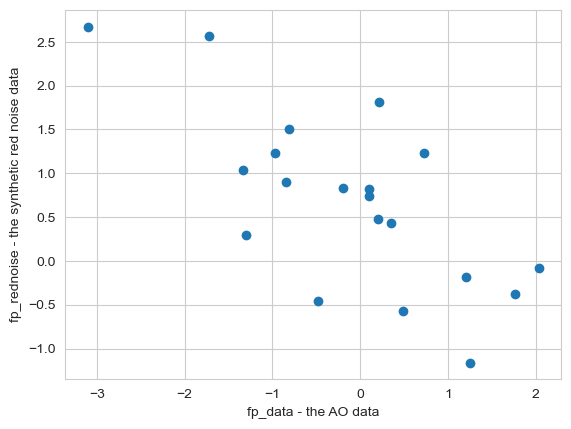

In [20]:
### You were searching for correlations, You searched long and hard (200 times!)
### You might expect that the largest correlation you found will be a false positive.  
### Is it?  Did your "fishing" for a high correlation work?

## data chunks with the largest correlation
fp_rednoise=rednoise[nn_largest_variance*offset:nn_largest_variance*offset+length]
fp_data=data[nn_largest_variance*offset:nn_largest_variance*offset+length]

## make a scatter plot - Do you see a correlation?
plt.scatter(fp_data,fp_rednoise);   
plt.xlabel('fp_data - the AO data');
plt.ylabel('fp_rednoise - the synthetic red noise data');

In [21]:
#### Calculate correlation statistics for your highest correlation 
#### Two methods are shown - they should give you the same answers.

### Calculate the correlation statistics - slow way, but convenient
slope, intercept, r_value, p_value, std_err = stats.linregress(fp_rednoise,fp_data)
print('scipy.stats.linregress slope: ',round(slope,3))
print('scipy.stats.linregress intercept: ',round(intercept,3))
print('scipy.stats.linregress r_value: ',round(r_value,3))

### Calculate the correlation statistics - direct and fast way
### for reference, answers should be the same...
### Shows direct calculation using Barnes notes
xdata=fp_rednoise-np.mean(fp_rednoise)
ydata=fp_data-np.mean(fp_data)
variancex=np.sum((xdata*xdata))
covariance=np.dot(xdata,ydata)
slope_fast=covariance/variancex                          ##Barnes Chapter 2, Eq. (14)
intercept_fast=np.mean(fp_data)-slope_fast*np.mean(fp_rednoise)  ##Barnes Chapter 2, Eq. (15)
variancey=np.sum((ydata*ydata))
rvalue_fast=np.dot(xdata,ydata)/(np.sqrt(variancex)*np.sqrt(variancey)) ##Barnes Chapter 2, Eq. (31)
print('direct method slope_fast: ',round(slope_fast,3))
print('direct method intercept_fast: ',round(intercept_fast,3))
print('direct method rvalue_fast: ',round(rvalue_fast,3))

scipy.stats.linregress slope:  -0.888
scipy.stats.linregress intercept:  0.492
scipy.stats.linregress r_value:  -0.716
direct method slope_fast:  -0.888
direct method intercept_fast:  0.492
direct method rvalue_fast:  -0.716


In [22]:
### Place a confidence interval on your correlation 
## Because you have found a correlation that is not equal to 0, use the Fisher-Z Transformation.

## Calculate the Fisher-Z Transformation mean, Barnes Ch. 2 Eq. 52
mu_Z=0.5*np.log((1+r_value)/(1-r_value)) 
#print('mu_Z:',mu_Z)
df=len(fp_data)-3     ## Calculate the degrees of freedom
sigma_Z=1/np.sqrt(df) ## Calculate the Fisher-Z Transformation standard deviation Barnes Ch. 2 Equation 53

## Calculate the critical value, i.e., the t-statistic
## Note: Python calculates left/lower-tail probabilities by default, so for the 95% confidence interval, use 0.975
tstat95=stats.t.ppf(0.975,df)
## Calculate the confidence intervals on the mean (mu_Z)
Zmin=mu_Z-tstat95*sigma_Z ## Barnes Ch. 2 Equation 54
Zmax=mu_Z+tstat95*sigma_Z ## Barnes Ch. 2 Equation 54
#print('Zmin',Zmin)
#print('Zmax',Zmax)

## Convert to give a confidence interval on the correlation using Barnes Ch. 2 Eq. 55
rho_min=np.tanh(Zmin)
rho_max=np.tanh(Zmax)
print('Rhomin (minimum 95% confidence interval for r_value):',round(rho_min,2))
print('Rhomax (maximum 95% confidence interval for r_value):',round(rho_max,2))

## If the confidence range for the true correlation given by Rhomin,Rhomax does not overlap with 0 -
## we can reject the null hypothesis that the correlation between fp_data and fp_rednoise is zero.
## If we reject the null hypothesis that the correlation is zero, we have found a false positive!

Rhomin (minimum 95% confidence interval for r_value): -0.89
Rhomax (maximum 95% confidence interval for r_value): -0.37


8) You went searching for correlations, you searched long and hard (200 times!) You should have been concerned that the largest correlation you found would be a false positive.  Do you think you found a false positive?  Explain what you found and potentially why you think it is important statistically but not physically.  What lessons did you learn by “fishing for correlations”?

FOR FUN:  Check out these __[spurious correlations](https://www.tylervigen.com/spurious-correlations)__

In [23]:
### Remember the Arctic warming blocking example from Barnes Chapter 1 applying a posteriori statistics?
### How likely was it that you would correctly reject H0 for all of the correlations you explored?  
### In other words - How likely are you to be correct in all of your assessments?
### You should find it is very unlikely... and this should make you wary of doing anything like what we
### were doing above when analyzing data and looking for correlations.
prob_correctly_rejecting_all=(0.95**N_fishingforcorrelation)*100
print('prob_correctly_rejecting_all',round(prob_correctly_rejecting_all,4),'%')

prob_correctly_rejecting_all 0.0035 %
